In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels


In [49]:
data = pd.read_csv('../Cleaned_data/data_after_2000.csv')

In [3]:
data.head()

,Unnamed: 0,country_code,country_name,year,gdp_growth_rate,government_type,gdp_per_capita
0,5990,AGO,Angola,2000,3.054624,Dictatorship,2195.631044
1,5991,ALB,Albania,2000,6.950036,Democracy,2244.624632
2,5992,ARE,United Arab Emirates,2000,10.852704,Dictatorship,63251.522987
3,5993,ARG,Argentina,2000,-0.788999,Democracy,8224.112827
4,5994,ARM,Armenia,2000,5.900000,Democracy,1403.031257


In [50]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.tail()

,country_code,country_name,year,gdp_growth_rate,government_type,gdp_per_capita
3435,WSM,Samoa,2018,-2.168099,Dictatorship,3748.844075
3436,YEM,"Yemen, Rep.",2018,-2.701475,Dictatorship,632.909430
3437,ZAF,South Africa,2018,0.787056,Dictatorship,7433.615398
3438,ZMB,Zambia,2018,3.794901,Dictatorship,1678.169124
3439,ZWE,Zimbabwe,2018,6.159190,Dictatorship,1305.783295


In [6]:
data.shape

(3440, 6)

In [11]:
data.columns

Index(['country_code', 'country_name', 'year', 'gdp_growth_rate',
       'government_type', 'gdp_per_capita'],
      dtype='object')

In [51]:
data_new = data[(data.year >= 2006) & (data.year <= 2011)]

data = data_new.copy()

## Analysis on second dataset.

In [52]:
# grouping by government_type (Democracy or Dictatorship)
grouped_gov_type = data.groupby('government_type')

# splitting the grouped data into democracy and dictatorship
dem = grouped_gov_type.get_group('Democracy')  # dem -> democracy
dic = grouped_gov_type.get_group('Dictatorship')  # dic -> dictatorship

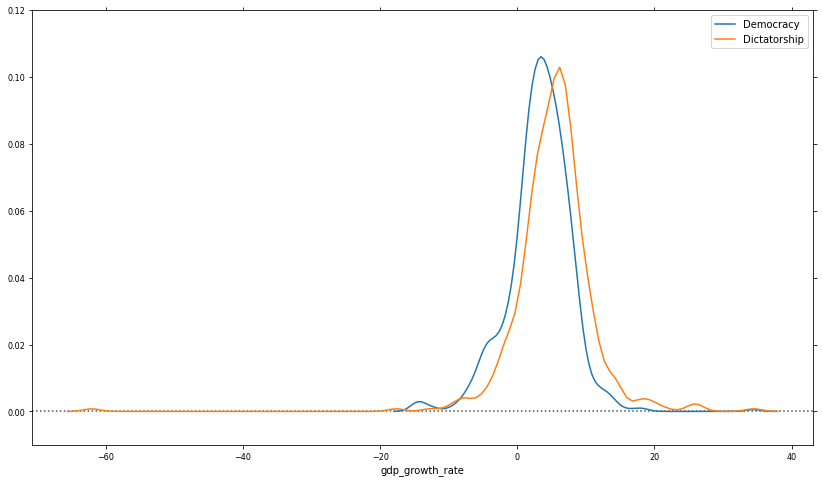

In [10]:
plt.figure(figsize=(14, 8))

plt.axhline(0, linestyle='dotted', color='k', alpha=0.7)
sns.distplot(dem.gdp_growth_rate, hist=False, label='Democracy')
sns.distplot(dic.gdp_growth_rate, hist=False, label='Dictatorship')


plt.ylim(-0.01, 0.12)

plt.tick_params(right=True, top=True)
plt.legend()
plt.show()

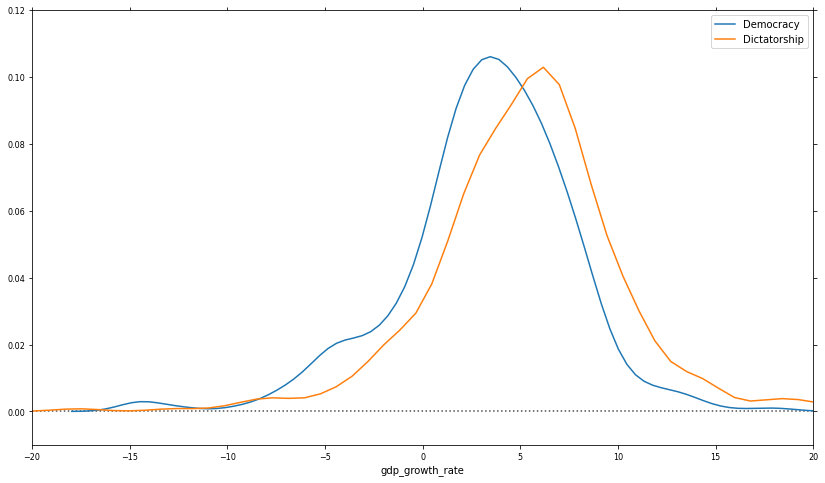

In [11]:
plt.figure(figsize=(14, 8))

plt.axhline(0, linestyle='dotted', color='k', alpha=0.7)
sns.distplot(dem.gdp_growth_rate, hist=False, label='Democracy')
sns.distplot(dic.gdp_growth_rate, hist=False, label='Dictatorship')


plt.ylim(-0.01, 0.12)
plt.xlim(-20, 20)

plt.tick_params(right=True, top=True)
plt.legend()
plt.show()

The same pattern as was in the data from 2000 to 20005.

In [12]:
dem.gdp_growth_rate[(dem.gdp_growth_rate >= 6)].size / dem.gdp_growth_rate.size

0.2585438335809807

In [13]:
dic.gdp_growth_rate[dic.gdp_growth_rate >= 6].size / dic.gdp_growth_rate.size

0.45390070921985815

In [14]:
dem.gdp_growth_rate.max(), dem.gdp_growth_rate.min()

(34.419290658104, -14.8141631583267)

In [15]:
dic.gdp_growth_rate.max(), dic.gdp_growth_rate.min()

(34.4662093637953, -62.075919584900106)

The highest values are same for both the types.

In [11]:
def Cdf(data):
    '''
    Input:
    data : a pandas series
    
    Output:
    cdf : an ndarray containing cdf
    values :  an ndarray containing the sorted values
    '''
    unique_data = np.unique(data.values, return_counts=True)
    
    values = unique_data[0]
    counts = unique_data[1]
    
    pdf = (counts/sum(counts)) * 100
    
    cdf = np.cumsum(pdf)
    
    return cdf, values

In [12]:
def calculate_cdf():
    '''
    Calculates cdf of GDP growth rates for both democracy and dictatorship
    
    returns : cdf
    '''
    dem_cdf, dem_values = Cdf(dem.gdp_growth_rate)
    dic_cdf, dic_values = Cdf(dic.gdp_growth_rate)

    cdf = []
    cdf.append(dem_cdf)
    cdf.append(dic_cdf)

    values = []
    values.append(dem_values)
    values.append(dic_values)
    
    return cdf, values

In [13]:
cdf, values = calculate_cdf()

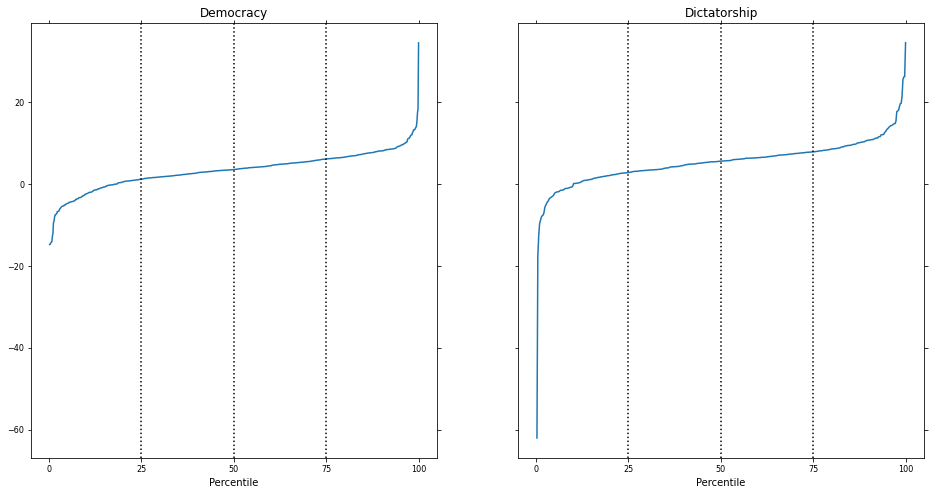

In [21]:
titles = ['Democracy', 'Dictatorship']

fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(16, 8), sharey=True)

for i in range(2):
    ax[i].plot(cdf[i], values[i])
    
    ax[i].set_xlabel('Percentile')
    ax[i].tick_params(right=True, top=True)
    ax[i].set_title(titles[i])

ax[0].set_xticks([0, 25, 50, 75, 100])

for i in [25, 50 ,75]:
    ax[0].axvline(i, linestyle='dotted', color='black')
    ax[1].axvline(i, linestyle='dotted', color='black')

plt.show()

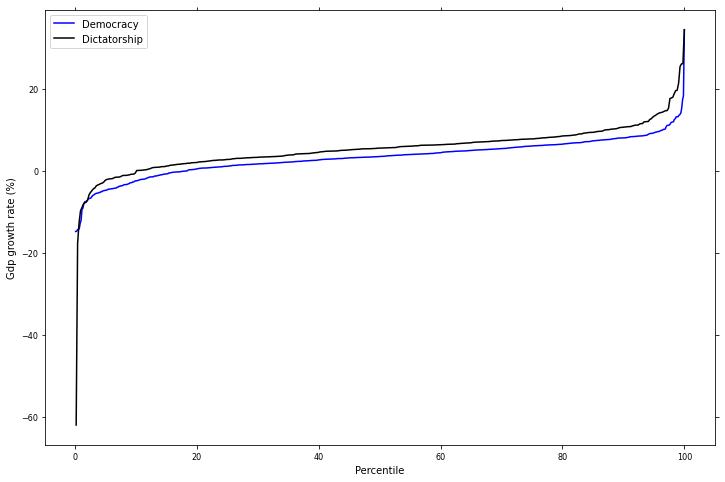

In [22]:
plt.figure(figsize=(12, 8))

plt.plot(cdf[0], values[0], color='b', label='Democracy')
plt.plot(cdf[1], values[1], color='k', label='Dictatorship')

plt.xlabel('Percentile')
plt.ylabel('Gdp growth rate (%)')
plt.tick_params(right=True, top=True)

plt.legend()
plt.show()

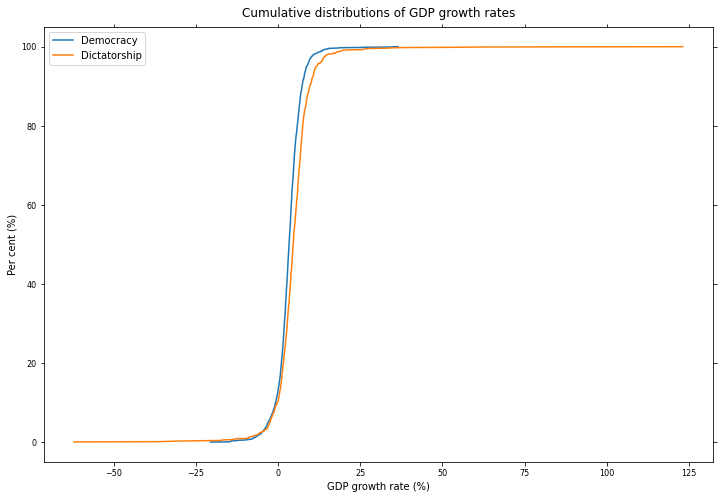

In [14]:
plt.figure(figsize=(12, 8))

plt.plot(values[0], cdf[0],label='Democracy')
plt.plot(values[1], cdf[1], label='Dictatorship')

plt.xlabel('GDP growth rate (%)')
plt.ylabel('Per cent (%)')
plt.tick_params(right=True, top=True)

plt.title('Cumulative distributions of GDP growth rates', pad=10)


plt.legend()
plt.show()

Dictatorship in this dataset performs even better than the 2000-2005 data

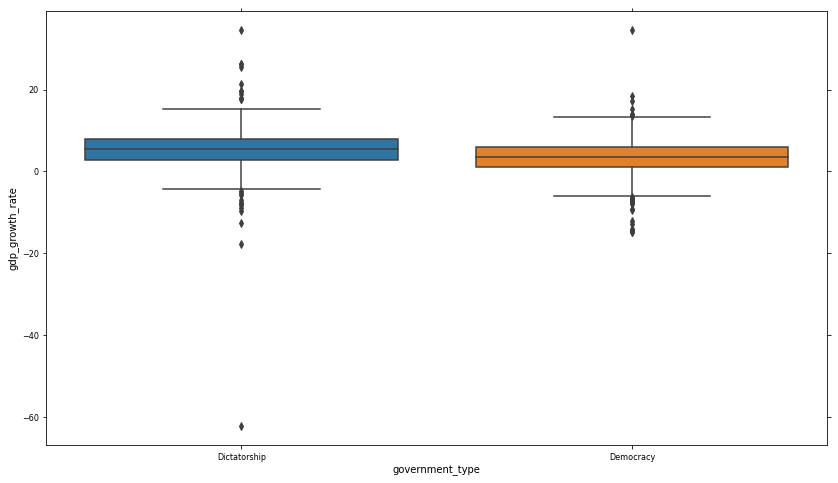

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='government_type', y='gdp_growth_rate', data=data)
plt.tick_params(right=True, top=True)
plt.show()

In [24]:
def median_diff(series1, series2):
    '''
    Returns the difference between the medians of the two series
    
    series1 : pandas series
    series2 : pandas series
    
    returns : the difference between the medians of the two series
    '''
    diff = series1.median() - series2.median()
    return diff

In [30]:
difference = median_diff(grouped_gov_type.get_group('Dictatorship').gdp_growth_rate, 
                         grouped_gov_type.get_group('Democracy').gdp_growth_rate)
print(difference)

2.0547834903420017


Wow! The median difference has rocketed to 2.05% from 0.8% in the 2000-2005 dataset.

In [35]:
def percentile_values(arr, ls):
    '''
    Input:
    arr: an ndarray
    ls: a python list of all the percentiles
    
    Output:
    Returns a list of corresponding values for the percentiles
    '''
    values = np.percentile(arr, ls)
    
    return values

In [38]:
ls = [i for i in range(25, 76)]
dem_percentile_values = percentile_values(values[0], ls)
dic_percentile_values = percentile_values(values[1], ls)

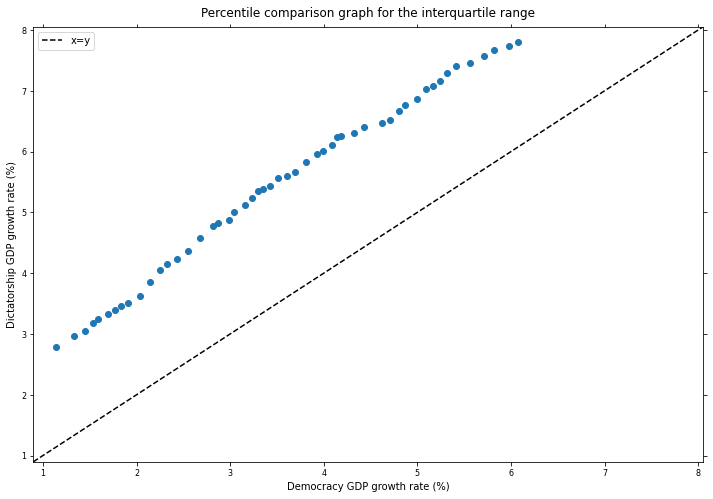

In [48]:
plt.figure(figsize=(12, 8))

plt.plot(dem_percentile_values, dic_percentile_values, 'o')
lims = [np.min([plt.xlim(), plt.ylim()]), np.max([plt.xlim(), plt.ylim()])]
plt.plot(lims, lims, 'k--', label='x=y')  # plotting x=y line

plt.xlabel('Democracy GDP growth rate (%)')
plt.ylabel('Dictatorship GDP growth rate (%)')
plt.title('Percentile comparison graph for the interquartile range', pad=10)

plt.xlim(lims)
plt.ylim(lims)
plt.tick_params(right=True, top=True)

plt.legend()

plt.show()

The points are parallel to the x=y line. The difference between the percentiles remains almost the same throughout the inter-quartile range. 

In [49]:
x = dem_percentile_values + dic_percentile_values
y = dic_percentile_values - dem_percentile_values

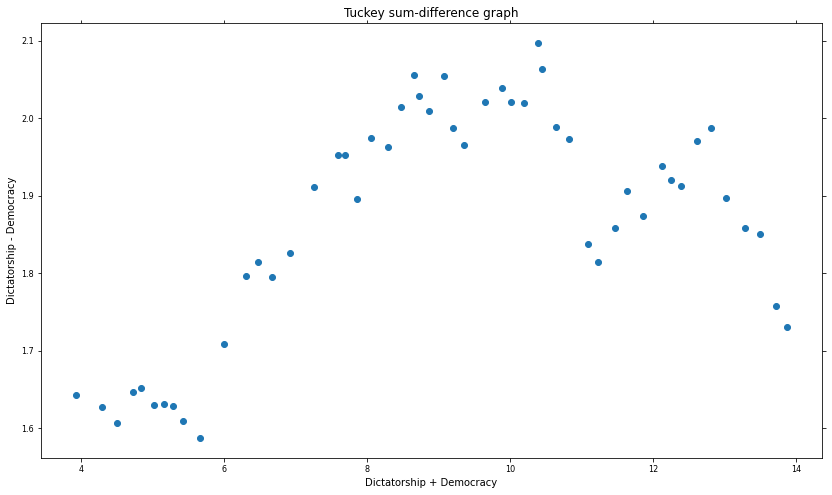

In [50]:
plt.figure(figsize=(14, 8))

plt.plot(x, y, 'o')

plt.xlabel('Dictatorship + Democracy')
plt.ylabel('Dictatorship - Democracy')

plt.tick_params(right=True, top=True)
plt.title('Tuckey sum-difference graph')
plt.show()

Time series

In [53]:
# grouping by year
grouped_dem_year = dem.groupby(by=['year'])
grouped_dic_year = dic.groupby(by=['year'])

dem_year_avg = grouped_dem_year.gdp_growth_rate.median().values

dic_year_avg = grouped_dic_year.gdp_growth_rate.median().values

In [54]:
years = [i for i in range(2006, 2012)]

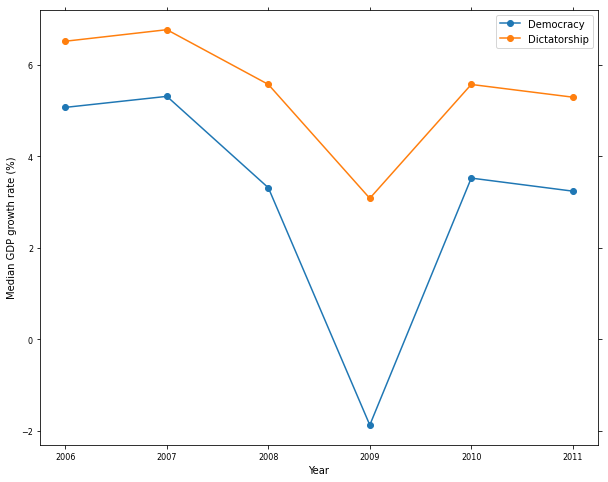

In [55]:
plt.figure(figsize=(10, 8))

plt.plot(years, dem_year_avg, 'o-', label='Democracy')
plt.plot(years, dic_year_avg, 'o-', label='Dictatorship')

plt.xlabel('Year')
plt.ylabel('Median GDP growth rate (%)')
plt.tick_params(right=True, top=True)

plt.legend()
plt.show()

## Controlling for income

Developing countries tend to have higher gdp growth rates as compared to developed countries. So, I will control for the income levels and do the analysis again and see if still there is a difference.

In [16]:
def income_classification(df):
    '''
    Classifies and divides the dataframe according to income levels.
    Classification is done according to GDP per capita
    
    df : dataframe
    
    returns : 4 dataframes. 1 for each income level.
    '''
        
    low_income_temp = df[df.gdp_per_capita <= 925]
    lower_middle_income_temp = df[(df.gdp_per_capita > 925) & (df.gdp_per_capita <= 3597)]
    upper_middle_income_temp = df[(df.gdp_per_capita > 3597) & (df.gdp_per_capita <= 11139)]
    high_income_temp = df[df.gdp_per_capita > 11139]

    low_income = low_income_temp.copy()
    lower_middle_income = lower_middle_income_temp.copy()
    upper_middle_income = upper_middle_income_temp.copy()
    high_income = high_income_temp.copy()

    return low_income, lower_middle_income, upper_middle_income, high_income

In [17]:
# classifying democracies according to income levels
income_classified_dem = income_classification(dem)

# classifying dictatorships according to income levels
income_classified_dic = income_classification(dic)

In [18]:
income_classified_dem[0].columns

Index(['country_code', 'country_name', 'year', 'gdp_growth_rate',
       'government_type', 'gdp_per_capita'],
      dtype='object')

In [19]:
income_levels = ['low_income', 'lower_middle_income', 'upper_middle_income', 'high_income']

In [20]:
def country_count():
    '''
    Prints the number of democratic and dictatorship countries for each income level.
    '''
    for i in range(4):
        print()
        print(income_levels[i])
        unique = np.unique(income_classified_dem[i].country_name)
        print('Democracy : ', unique.size)
        unique = np.unique(income_classified_dic[i].country_name)
        print('Dictatorship :', unique.size)

In [21]:
country_count()


low_income
Democracy :  15
Dictatorship : 30

lower_middle_income
Democracy :  38
Dictatorship : 43

upper_middle_income
Democracy :  45
Dictatorship : 32

high_income
Democracy :  50
Dictatorship : 14


Only 27% of the countries in the low-income group are democratic.

47% of the countries in the lower-middle-income group are democratic.

58% of the countries in the upper-middle-income group are democratic.

78% of the countries in the high-income group are democratic.

So, dictator countries dominate the lower-income group and democratic countries dominate the high-income group.

## Analysis after controlling for income.

Difference in median GDP growth rates for Dictatorship and Democracy

In [25]:
def income_classified_median_diff():
    '''
    Prints the difference between median GDP growth rate of dictatorship and democratic countries \
    for each income group.
    '''
    for i in range(4):
        print(income_levels[i], ' = ', end=' ')
        diff = median_diff(income_classified_dic[i].gdp_growth_rate,
                           income_classified_dem[i].gdp_growth_rate)
        print(diff)

In [26]:
income_classified_median_diff()  # median(dictatorship) - median(democracy)

low_income  =  1.2087431765870162
lower_middle_income  =  0.42415179193725994
upper_middle_income  =  0.2096065707412551
high_income  =  1.4208392561841947


The difference has increased in the lower-middle-income group in the favour of dictatorships, compared to the 2000-2005 data.

In [30]:
def income_classified_cdf():
    dem_cdf = []
    dic_cdf = []
    
    for i in range(4):
        cdf, values = Cdf(income_classified_dem[i].gdp_growth_rate)
        dem_cdf.append((cdf, values))

        cdf, values = Cdf(income_classified_dic[i].gdp_growth_rate)
        dic_cdf.append((cdf, values))
    
    return dem_cdf, dic_cdf

In [31]:
dem_cdf, dic_cdf = income_classified_cdf()

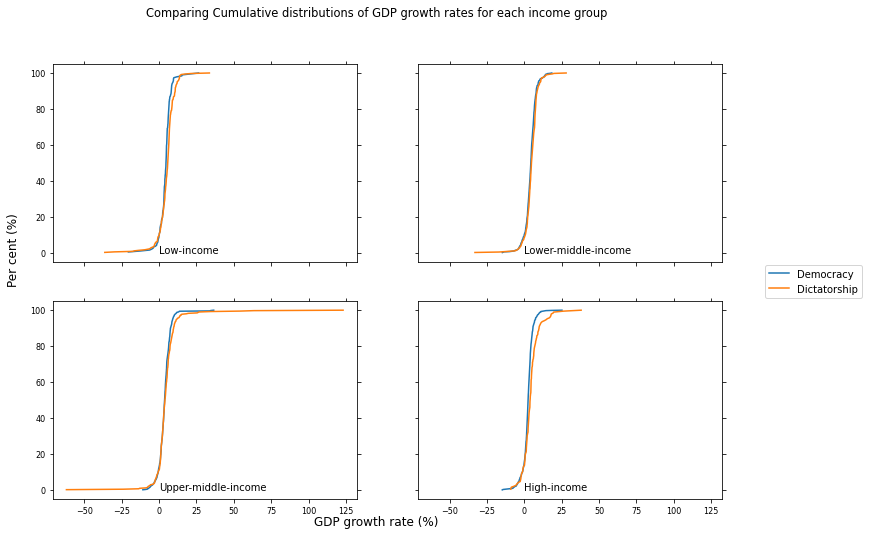

In [32]:
titles = ['Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharey=True, sharex=True)

k = 0
for i in range(2):
    for j in range(2):
        ax[i][j].plot(dem_cdf[k][1], dem_cdf[k][0], label='Democracy')
        ax[i][j].plot(dic_cdf[k][1], dic_cdf[k][0], label='Dictatorship')
        ax[i][j].tick_params(right=True, top=True)
        ax[i][j].text(0, 0, titles[k], fontsize=10)
        k += 1
        
plt.figtext(0.08, 0.5, 'Per cent (%)', ha='center', rotation=90, fontsize=12)
plt.figtext(0.5, 0.08, 'GDP growth rate (%)', ha='center', fontsize=12)

fig.suptitle('Comparing Cumulative distributions of GDP growth rates for each income group', fontsize=11.5)

plt.legend(bbox_to_anchor=[1.3, 1.1], loc='center')
#plt.savefig('cdf_classified', dpi=150, bbox_inches='tight')fsa
plt.show()

In [36]:
ls = [i for i in range(25, 76)]
dem_percentile_values = []
dic_percentile_values = []

for i in range(4):
    dem_percentiles = percentile_values(dem_cdf[i][1] ,ls)
    dem_percentile_values.append(dem_percentiles)
    
    dic_percentiles = percentile_values(dic_cdf[i][1], ls)
    dic_percentile_values.append(dic_percentiles)

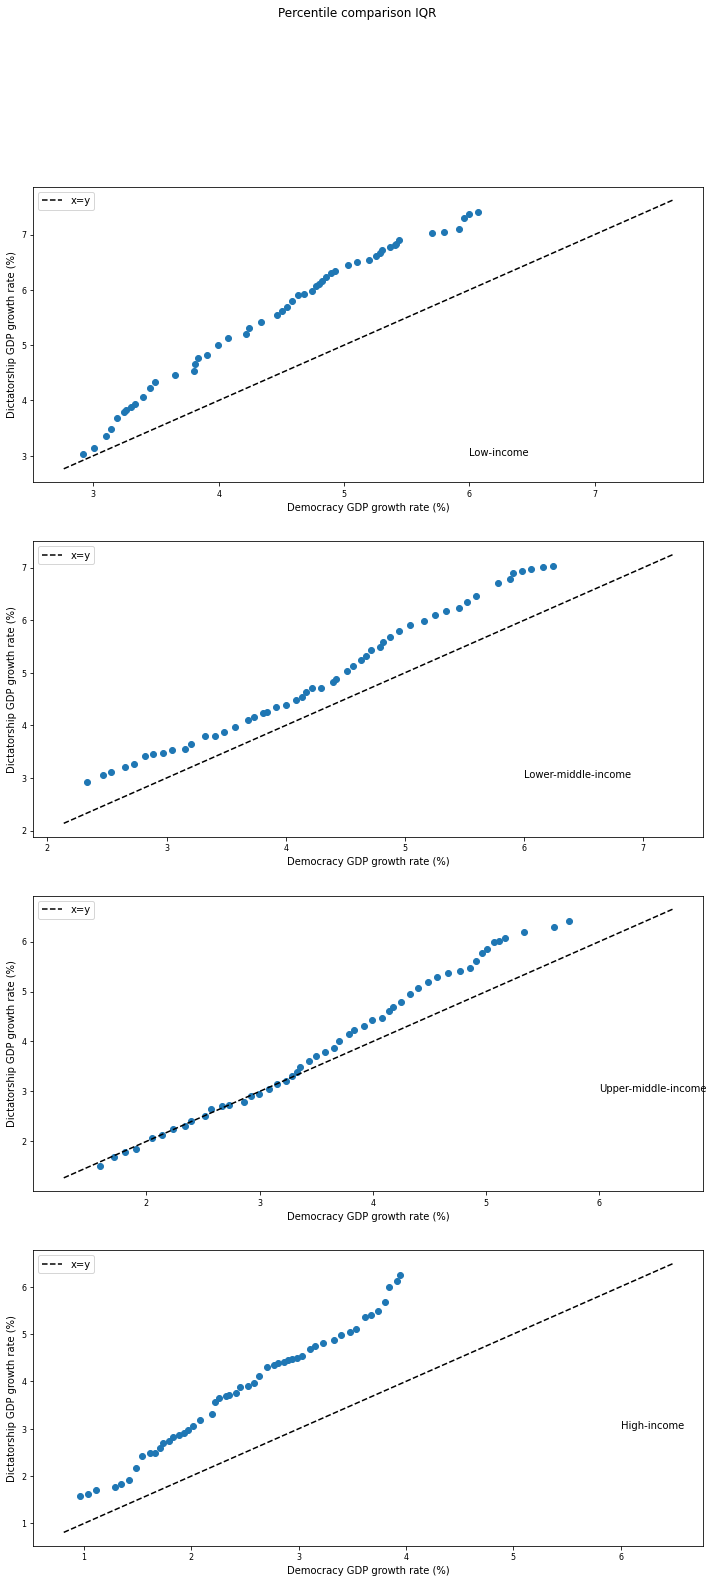

In [40]:
income_levels = ['Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income']
fig, ax = plt.subplots(nrows=4, figsize=(12, 25))

for i in range(4):
    ax[i].plot(dem_percentile_values[i], dic_percentile_values[i], 'o')
    lims = [np.min([ax[i].get_xlim(), ax[i].get_ylim()]), np.max([ax[i].get_xlim(), ax[i].get_ylim()])]
    ax[i].plot(lims, lims, 'k--', label='x=y')  # plotting x=y line
    ax[i].set_xlabel('Democracy GDP growth rate (%)')
    ax[i].set_ylabel('Dictatorship GDP growth rate (%)')
    ax[i].legend()
    ax[i].text(6,3, income_levels[i], fontsize=10)

plt.suptitle('Percentile comparison IQR')
plt.show()